In [0]:
from keras.datasets import mnist

In [128]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
import matplotlib.pyplot as plt

In [0]:
single_image = x_train[0]

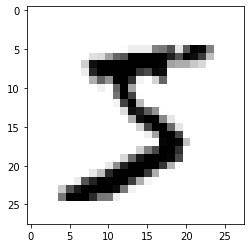

In [134]:
plt.imshow(single_image, cmap='gray_r')

In [0]:
from keras.utils.np_utils import to_categorical

In [0]:
y_cat_test = to_categorical(y_test, 10)
y_cat_train = to_categorical(y_train, 10)

In [0]:
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [0]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [142]:
model.fit(x_train, y_cat_train, epochs=2)

Epoch 1/2
60000/60000 [==============================] - 11s 188us/step - loss: 0.1325 - accuracy: 0.9598
Epoch 2/2
60000/60000 [==============================] - 7s 111us/step - loss: 0.0488 - accuracy: 0.9849


In [143]:
model.evaluate(x_test, y_cat_test)

10000/10000 [==============================] - 1s 70us/step


[0.0416181255173462, 0.9866999983787537]

In [0]:
from sklearn.metrics import classification_report

In [0]:
predictions = model.predict_classes(x_test)

In [146]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       1.00      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

